# Image Processing with OpenCV
Source:
- https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html

In [1]:
import cv2 as cv
import numpy as np
from PIL import Image

def imdisplay(img):
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    display(Image.fromarray(img_rgb))

# Changing color-space

In [2]:
camera = cv.VideoCapture(0)

if not camera.isOpened():
    raise Exception("Camera not found.")

while True:
    ret, frame = camera.read()
    
    if not ret:
        camera.release()
        writer.release()
        cv.destroyAllWindows()
        raise Exception("Can't recieve frame.")
    
    frame = cv.rotate(frame, cv.ROTATE_90_COUNTERCLOCKWISE)

    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    lower_yellow = np.array([20,50,50])
    upper_yellow = np.array([35,255,255])
    mask_blue = cv.inRange(hsv, lower_blue, upper_blue)
    mask_yellow = cv.inRange(hsv, lower_yellow, upper_yellow)
    res = cv.bitwise_or(cv.bitwise_and(frame, frame, mask=mask_blue),
          cv.bitwise_and(frame, frame, mask=mask_yellow))

    cv.imshow('frame', frame)
    cv.imshow('mask_blue', mask_blue)
    cv.imshow('mask_yellow', mask_yellow)
    cv.imshow('res', res)
    if cv.waitKey(1) == ord('q'):
        break

camera.release()
cv.destroyAllWindows()

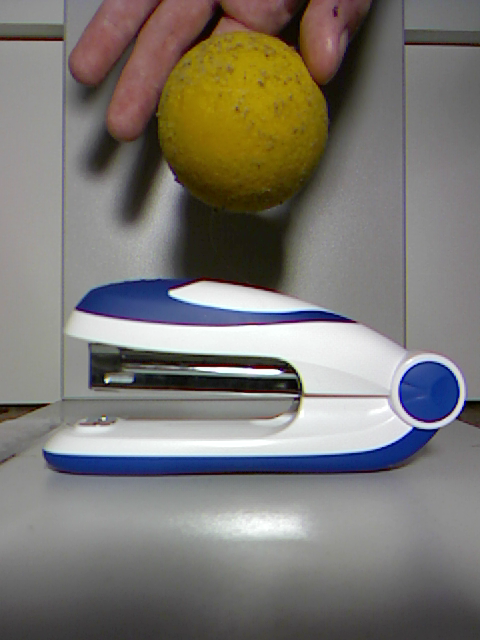

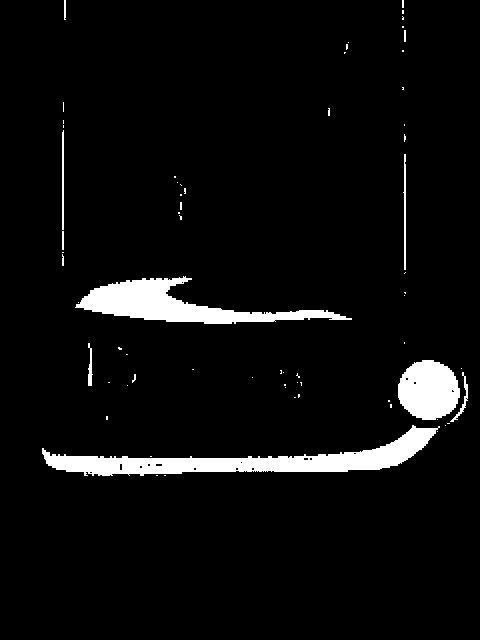

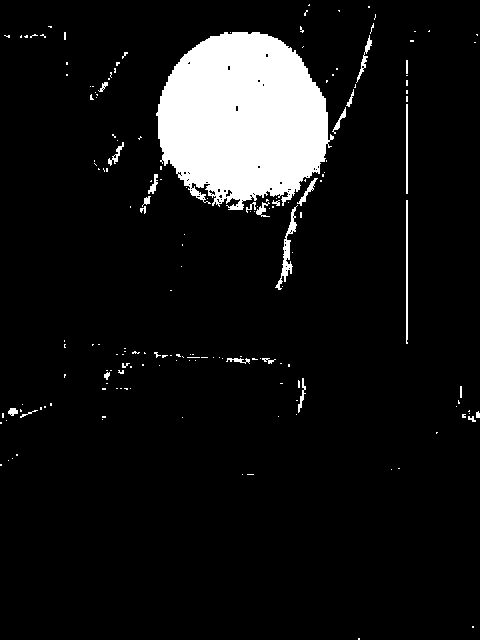

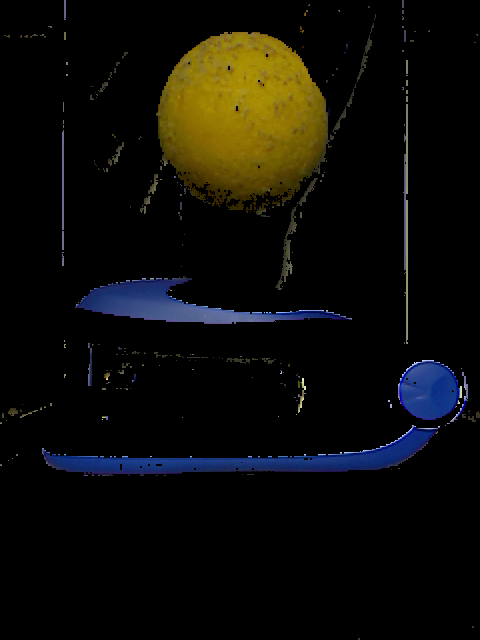

In [3]:
imdisplay(frame)
imdisplay(mask_blue)
imdisplay(mask_yellow)
imdisplay(res)